In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.2402 - val_loss: 0.1658
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1496 - val_loss: 0.1359
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1299 - val_loss: 0.1217
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1198 - val_loss: 0.1150
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1142 - val_loss: 0.1107
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1101 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1069 - val_loss: 0.1043
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1041 - val_loss: 0.1016
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1018 - val_loss: 0.0998
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1000 - val_loss: 

1/1 [==============================] - 0s 73ms/step


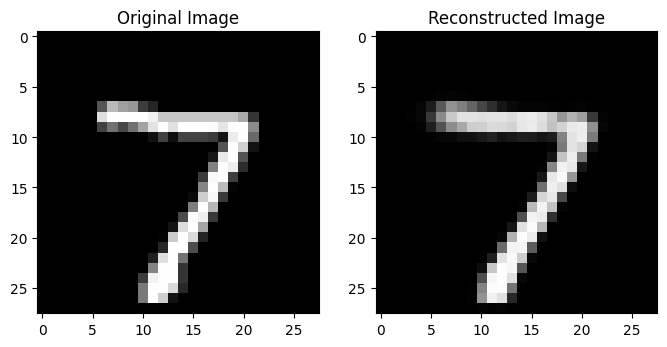

In [ ]:
sample_image = x_test[0:1]
reconstructed_image = autoencoder.predict(sample_image)
reconstructed_image = reconstructed_image.reshape(28, 28)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(sample_image.reshape(28, 28), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image')
plt.imshow(reconstructed_image, cmap='gray')
plt.show()